In [1]:
import pandas as pd, numpy as np # For Data Manipulation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Amazon Food Dataset.csv')
df

,Custkey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
0,10025248,5/23/2017,340.8400,2017/05/23,100080,P01,61762,Carlson Blueberry Yogurt,2000,803.8600,200086,5/23/2017,463.02,803.8600,0.00,463.02,463.020,1,145,EA
1,10025063,6/2/2017,16812.4800,2017/06/02,100093,NaN,62058,Big Time Popsicles,2000,1293.0000,200101,5/29/2017,14219.52,31032.0000,0.00,14219.52,592.480,24,162,EA
2,10025549,6/2/2017,195.3900,2017/06/02,100094,P01,24335,Kiwi Scallops,2000,217.1000,200105,6/2/2017,238.81,434.2000,0.00,238.81,119.405,2,103,EA
3,10002489,6/3/2017,-211.7500,2017/06/03,100096,P03,NaN,Kiwi Lox,1000,0.0000,200107,6/3/2017,211.75,0.0000,0.00,211.75,211.750,1,160,EA
4,10015824,6/12/2017,317.4600,2017/06/12,100130,P01,31682,Golden Waffles,15000,317.4600,200143,6/12/2017,317.46,634.9200,0.00,317.46,158.730,2,103,EA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65275,10025025,5/11/2019,1327.1200,2019/05/11,332837,P01,17801,Better Fancy Canned Sardines,4000,1431.2300,126601,5/11/2019,1535.34,2862.4600,899.38,635.96,767.670,2,110,EA
65276,10020181,5/11/2019,639.8200,2019/05/11,332840,P01,17801,Better Fancy Canned Sardines,3000,1431.2300,126609,5/11/2019,791.41,1431.2300,449.69,341.72,791.410,1,115,EA
65277,10020181,5/11/2019,1028.5798,2019/05/11,332840,P01,31875,Golden Frozen Chicken Thighs,2000,1150.4399,126609,5/11/2019,1272.30,2300.8798,640.09,632.21,636.150,2,115,EA
65278,10020181,5/11/2019,1121.3398,2019/05/11,332840,P01,37441,Atomic Mint Chocolate Bar,1000,1254.1899,126609,5/11/2019,1387.04,2508.3798,688.55,698.49,693.520,2,115,EA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65280 entries, 0 to 65279
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Custkey                           65280 non-null  int64  
 1   DateKey                           65280 non-null  object 
 2   Discount Amount                   65278 non-null  float64
 3   Invoice Date                      65280 non-null  object 
 4   Invoice Number                    65280 non-null  int64  
 5   Item Class                        56995 non-null  object 
 6   Item Number                       65240 non-null  object 
 7   Item                              65280 non-null  object 
 8   Line Number                       65280 non-null  int64  
 9   List Price                        65280 non-null  float64
 10  Order Number                      65280 non-null  int64  
 11  Promised Delivery Date            65280 non-null  object 
 12  Sale

In [4]:
df.info() # Dataframe Information (Provide Information on Missing Data)
variable_missing_data = df.isna().sum(); variable_missing_data # Variable-wise Missing Data Information
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data # Record-wise Missing Data Information (Top 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65280 entries, 0 to 65279
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Custkey                           65280 non-null  int64  
 1   DateKey                           65280 non-null  object 
 2   Discount Amount                   65278 non-null  float64
 3   Invoice Date                      65280 non-null  object 
 4   Invoice Number                    65280 non-null  int64  
 5   Item Class                        56995 non-null  object 
 6   Item Number                       65240 non-null  object 
 7   Item                              65280 non-null  object 
 8   Line Number                       65280 non-null  int64  
 9   List Price                        65280 non-null  float64
 10  Order Number                      65280 non-null  int64  
 11  Promised Delivery Date            65280 non-null  object 
 12  Sale

9138     4
6        3
32       2
11420    2
4974     2
dtype: int64

In [5]:
variable_missing_data = df.isna().sum(); variable_missing_data # Variable-wise Missing Data Information

Custkey                                0
DateKey                                0
Discount Amount                        2
Invoice Date                           0
Invoice Number                         0
Item Class                          8285
Item Number                           40
Item                                   0
Line Number                            0
List Price                             0
Order Number                           0
Promised Delivery Date                 0
Sales Amount                           0
Sales Amount Based on List Price       0
Sales Cost Amount                      0
Sales Margin Amount                    0
Sales Price                            1
Sales Quantity                         0
Sales Rep                              0
U/M                                    0
dtype: int64

In [6]:
import pandas as pd


df = pd.read_csv('Amazon Food Dataset.csv')

# Display data types of each column
print(df.dtypes)

Custkey                               int64
DateKey                              object
Discount Amount                     float64
Invoice Date                         object
Invoice Number                        int64
Item Class                           object
Item Number                          object
Item                                 object
Line Number                           int64
List Price                          float64
Order Number                          int64
Promised Delivery Date               object
Sales Amount                        float64
Sales Amount Based on List Price    float64
Sales Cost Amount                   float64
Sales Margin Amount                 float64
Sales Price                         float64
Sales Quantity                        int64
Sales Rep                             int64
U/M                                  object
dtype: object


In [7]:
# Extract categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns

# Extract non-categorical columns
non_categorical_columns = df.select_dtypes(exclude=['object', 'category', 'bool']).columns

# Display the results
print("Categorical Columns:")
print(categorical_columns)

print("\nNon-Categorical Columns:")
print(non_categorical_columns)

Categorical Columns:
Index(['DateKey', 'Invoice Date', 'Item Class', 'Item Number', 'Item',
       'Promised Delivery Date', 'U/M'],
      dtype='object')

Non-Categorical Columns:
Index(['Custkey', 'Discount Amount', 'Invoice Number', 'Line Number',
       'List Price', 'Order Number', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep'],
      dtype='object')


In [8]:
df_cat=df[['DateKey', 'Invoice Date', 'Item Class', 'Item Number','Item' , 'Promised Delivery Date']]
df_cat

,DateKey,Invoice Date,Item Class,Item Number,Item,Promised Delivery Date
0,5/23/2017,2017/05/23,P01,61762,Carlson Blueberry Yogurt,5/23/2017
1,6/2/2017,2017/06/02,NaN,62058,Big Time Popsicles,5/29/2017
2,6/2/2017,2017/06/02,P01,24335,Kiwi Scallops,6/2/2017
3,6/3/2017,2017/06/03,P03,NaN,Kiwi Lox,6/3/2017
4,6/12/2017,2017/06/12,P01,31682,Golden Waffles,6/12/2017
...,...,...,...,...,...,...
65275,5/11/2019,2019/05/11,P01,17801,Better Fancy Canned Sardines,5/11/2019
65276,5/11/2019,2019/05/11,P01,17801,Better Fancy Canned Sardines,5/11/2019
65277,5/11/2019,2019/05/11,P01,31875,Golden Frozen Chicken Thighs,5/11/2019
65278,5/11/2019,2019/05/11,P01,37441,Atomic Mint Chocolate Bar,5/11/2019


In [9]:
df_non_cat=df[['Custkey', 'Discount Amount', 'Invoice Number', 'Line Number',
       'List Price', 'Order Number','Sales Amount','Sales Amount Based on List Price','Sales Cost Amount','Sales Margin Amount','Sales Price','Sales Quantity']]
df_non_cat

,Custkey,Discount Amount,Invoice Number,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity
0,10025248,340.8400,100080,2000,803.8600,200086,463.02,803.8600,0.00,463.02,463.020,1
1,10025063,16812.4800,100093,2000,1293.0000,200101,14219.52,31032.0000,0.00,14219.52,592.480,24
2,10025549,195.3900,100094,2000,217.1000,200105,238.81,434.2000,0.00,238.81,119.405,2
3,10002489,-211.7500,100096,1000,0.0000,200107,211.75,0.0000,0.00,211.75,211.750,1
4,10015824,317.4600,100130,15000,317.4600,200143,317.46,634.9200,0.00,317.46,158.730,2
...,...,...,...,...,...,...,...,...,...,...,...,...
65275,10025025,1327.1200,332837,4000,1431.2300,126601,1535.34,2862.4600,899.38,635.96,767.670,2
65276,10020181,639.8200,332840,3000,1431.2300,126609,791.41,1431.2300,449.69,341.72,791.410,1
65277,10020181,1028.5798,332840,2000,1150.4399,126609,1272.30,2300.8798,640.09,632.21,636.150,2
65278,10020181,1121.3398,332840,1000,1254.1899,126609,1387.04,2508.3798,688.55,698.49,693.520,2


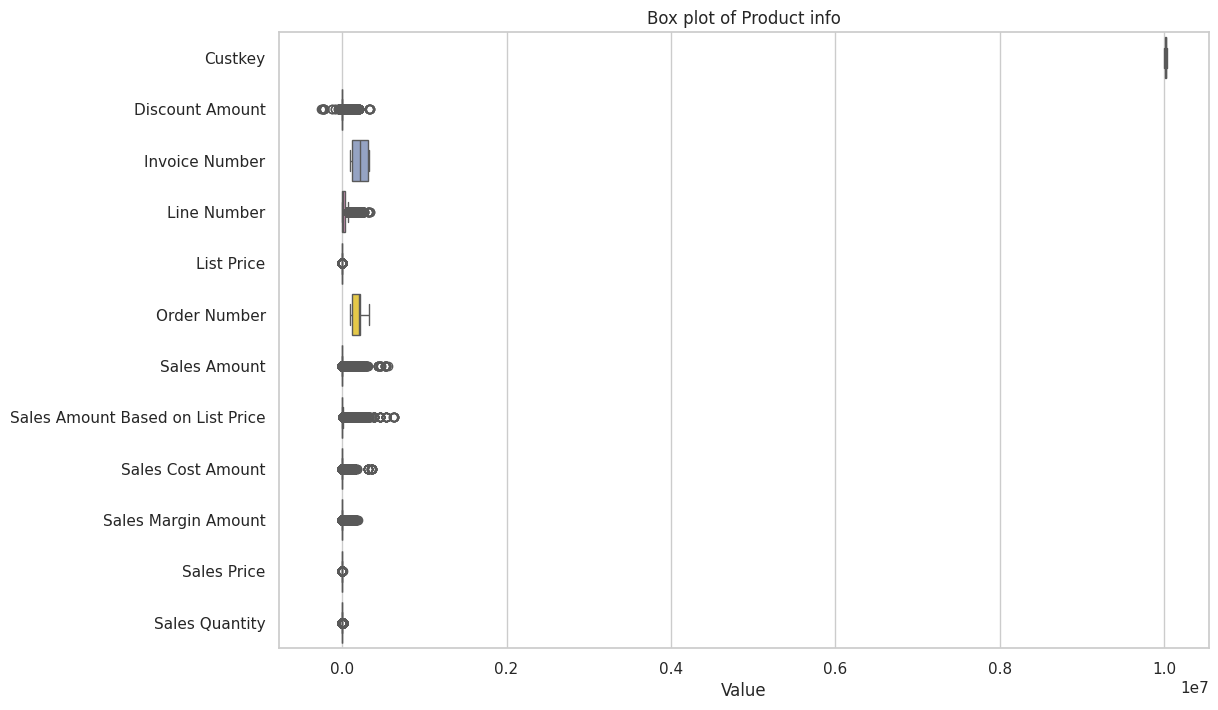

In [10]:
columns = ['Custkey', 'Discount Amount', 'Invoice Number', 'Line Number',
       'List Price', 'Order Number','Sales Amount','Sales Amount Based on List Price','Sales Cost Amount','Sales Margin Amount','Sales Price','Sales Quantity']
# Creating box plots for each column
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.boxplot(data=df_non_cat[columns], orient="h", palette="Set2")
plt.title("Box plot of Product info")
plt.xlabel("Value")
plt.show()

In [11]:
df_non_cat_mdt=df_non_cat[['Custkey', 'Discount Amount', 'Invoice Number', 'Line Number',
       'List Price', 'Order Number','Sales Amount','Sales Amount Based on List Price','Sales Cost Amount','Sales Margin Amount','Sales Price','Sales Quantity']]
rs = RobustScaler(quantile_range=(10.0, 90.0)) # quantile_range=(25.0, 75.0) - Default Range
rs_fit = rs.fit_transform(df_non_cat_mdt[['Custkey', 'Discount Amount', 'Invoice Number', 'Line Number',
       'List Price', 'Order Number','Sales Amount','Sales Amount Based on List Price','Sales Cost Amount','Sales Margin Amount','Sales Price','Sales Quantity']])
df_non_cat_robust_norm = pd.DataFrame(rs_fit, columns=df_non_cat_mdt.columns+'_y'); df_non_cat_robust_norm
df_non_cat_mdt_rn = df_non_cat_robust_norm

In [12]:
df_cat_ppd = df_cat.copy(); df_cat_ppd # Preferred Data Subset

,DateKey,Invoice Date,Item Class,Item Number,Item,Promised Delivery Date
0,5/23/2017,2017/05/23,P01,61762,Carlson Blueberry Yogurt,5/23/2017
1,6/2/2017,2017/06/02,NaN,62058,Big Time Popsicles,5/29/2017
2,6/2/2017,2017/06/02,P01,24335,Kiwi Scallops,6/2/2017
3,6/3/2017,2017/06/03,P03,NaN,Kiwi Lox,6/3/2017
4,6/12/2017,2017/06/12,P01,31682,Golden Waffles,6/12/2017
...,...,...,...,...,...,...
65275,5/11/2019,2019/05/11,P01,17801,Better Fancy Canned Sardines,5/11/2019
65276,5/11/2019,2019/05/11,P01,17801,Better Fancy Canned Sardines,5/11/2019
65277,5/11/2019,2019/05/11,P01,31875,Golden Frozen Chicken Thighs,5/11/2019
65278,5/11/2019,2019/05/11,P01,37441,Atomic Mint Chocolate Bar,5/11/2019


In [13]:
# Pre-Processed Non-Categorical Data Subset
df_non_cat_ppd = df_non_cat_mdt_rn.copy(); df_non_cat_ppd # Preferred Data Subset

,Custkey_y,Discount Amount_y,Invoice Number_y,Line Number_y,List Price_y,Order Number_y,Sales Amount_y,Sales Amount Based on List Price_y,Sales Cost Amount_y,Sales Margin Amount_y,Sales Price_y,Sales Quantity_y
0,0.302618,-0.037399,-0.563018,-0.172414,0.403982,-0.017189,-0.025394,-0.030692,-0.147315,0.140334,0.444183,-0.068966
1,0.292590,6.066598,-0.562959,-0.172414,0.816800,-0.017118,3.815498,4.744188,-0.147315,9.055978,0.650096,0.724138
2,0.318933,-0.091299,-0.562954,-0.172414,-0.091224,-0.017099,-0.087994,-0.089084,-0.147315,-0.004977,-0.102356,-0.034483
3,-0.930999,-0.242175,-0.562945,-0.189655,-0.274450,-0.017089,-0.095550,-0.157671,-0.147315,-0.022515,0.044524,-0.068966
4,-0.208196,-0.046063,-0.562789,0.051724,-0.006524,-0.016918,-0.066035,-0.057378,-0.147315,0.045996,-0.039808,-0.034483
...,...,...,...,...,...,...,...,...,...,...,...,...
65275,0.290531,0.328093,0.504218,-0.137931,0.933462,-0.366514,0.274004,0.294487,0.287756,0.252417,0.928746,-0.034483
65276,0.027969,0.073396,0.504232,-0.155172,0.933462,-0.366476,0.066295,0.068408,0.070221,0.061719,0.966506,-0.068966
65277,0.027969,0.217461,0.504232,-0.172414,0.696484,-0.366476,0.200562,0.205779,0.162326,0.249987,0.719556,-0.034483
65278,0.027969,0.251836,0.504232,-0.189655,0.784046,-0.366476,0.232598,0.238556,0.185768,0.292943,0.810806,-0.034483


In [14]:
df_ppd = df_cat_ppd.join(df_non_cat_ppd); df_ppd # Pre-Processed Dataset
df_ppd


,DateKey,Invoice Date,Item Class,Item Number,Item,Promised Delivery Date,Custkey_y,Discount Amount_y,Invoice Number_y,Line Number_y,List Price_y,Order Number_y,Sales Amount_y,Sales Amount Based on List Price_y,Sales Cost Amount_y,Sales Margin Amount_y,Sales Price_y,Sales Quantity_y
0,5/23/2017,2017/05/23,P01,61762,Carlson Blueberry Yogurt,5/23/2017,0.302618,-0.037399,-0.563018,-0.172414,0.403982,-0.017189,-0.025394,-0.030692,-0.147315,0.140334,0.444183,-0.068966
1,6/2/2017,2017/06/02,NaN,62058,Big Time Popsicles,5/29/2017,0.292590,6.066598,-0.562959,-0.172414,0.816800,-0.017118,3.815498,4.744188,-0.147315,9.055978,0.650096,0.724138
2,6/2/2017,2017/06/02,P01,24335,Kiwi Scallops,6/2/2017,0.318933,-0.091299,-0.562954,-0.172414,-0.091224,-0.017099,-0.087994,-0.089084,-0.147315,-0.004977,-0.102356,-0.034483
3,6/3/2017,2017/06/03,P03,NaN,Kiwi Lox,6/3/2017,-0.930999,-0.242175,-0.562945,-0.189655,-0.274450,-0.017089,-0.095550,-0.157671,-0.147315,-0.022515,0.044524,-0.068966
4,6/12/2017,2017/06/12,P01,31682,Golden Waffles,6/12/2017,-0.208196,-0.046063,-0.562789,0.051724,-0.006524,-0.016918,-0.066035,-0.057378,-0.147315,0.045996,-0.039808,-0.034483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65275,5/11/2019,2019/05/11,P01,17801,Better Fancy Canned Sardines,5/11/2019,0.290531,0.328093,0.504218,-0.137931,0.933462,-0.366514,0.274004,0.294487,0.287756,0.252417,0.928746,-0.034483
65276,5/11/2019,2019/05/11,P01,17801,Better Fancy Canned Sardines,5/11/2019,0.027969,0.073396,0.504232,-0.155172,0.933462,-0.366476,0.066295,0.068408,0.070221,0.061719,0.966506,-0.068966
65277,5/11/2019,2019/05/11,P01,31875,Golden Frozen Chicken Thighs,5/11/2019,0.027969,0.217461,0.504232,-0.172414,0.696484,-0.366476,0.200562,0.205779,0.162326,0.249987,0.719556,-0.034483
65278,5/11/2019,2019/05/11,P01,37441,Atomic Mint Chocolate Bar,5/11/2019,0.027969,0.251836,0.504232,-0.189655,0.784046,-0.366476,0.232598,0.238556,0.185768,0.292943,0.810806,-0.034483


In [15]:
# Dataset Used : df_ppd

train_df, test_df = train_test_split(df_ppd, test_size=0.25, random_state=1234)
train_df # Training Dataset
test_df # Testing Dataset

,DateKey,Invoice Date,Item Class,Item Number,Item,Promised Delivery Date,Custkey_y,Discount Amount_y,Invoice Number_y,Line Number_y,List Price_y,Order Number_y,Sales Amount_y,Sales Amount Based on List Price_y,Sales Cost Amount_y,Sales Margin Amount_y,Sales Price_y,Sales Quantity_y
20465,2/20/2017,2017/02/20,P01,28929,Nationeel Potato Chips,2/20/2017,0.209930,0.070550,-0.456729,-0.172414,-0.242919,0.070393,0.002627,0.031175,-0.032343,0.051343,-0.264274,1.000000
53981,2/2/2019,2019/02/02,P01,17801,Better Fancy Canned Sardines,2/2/2019,-1.038755,0.310495,0.448512,-0.155172,0.933462,-0.410252,0.287263,0.294487,0.287756,0.283196,0.966514,-0.034483
28651,4/17/2017,2017/04/17,P01,34901,Better Noodle Soup,4/18/2017,-0.794569,-0.058425,-0.417727,-0.172414,-0.230665,0.100669,-0.089142,-0.075720,-0.087432,-0.087870,-0.254946,0.241379
42835,7/28/2019,2019/07/28,P01,39680,Even Better String Cheese,7/28/2019,0.151282,-0.071125,0.389056,0.103448,-0.052360,-0.473918,-0.077480,-0.074536,-0.049091,-0.112167,-0.072406,-0.034483
61632,12/17/2019,2019/12/17,P01,29754,BBB Best Pepper,12/17/2019,0.209171,-0.078243,0.483727,0.206897,0.135583,-0.388343,-0.083413,-0.080927,-0.068706,-0.099659,0.113665,-0.068966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31259,1/21/2018,2018/01/21,P01,47801,Red Spade Foot-Long Hot Dogs,1/21/2018,-0.113231,0.081642,-0.007192,0.137931,1.099394,0.542661,0.114977,0.099465,0.082827,0.157833,1.243835,-0.068966
45510,9/3/2019,2019/09/03,P01,25300,Fast Dried Apples,9/3/2019,-0.475798,-0.064603,0.404650,-0.189655,-0.106154,-0.449774,-0.062310,-0.063174,-0.066138,-0.054117,-0.116891,0.000000
55874,2/25/2019,2019/02/25,P01,39900,Washington Cranberry Juice,2/26/2019,-0.025530,-0.065018,0.458311,0.413793,-0.116619,-0.402551,-0.072384,-0.069050,-0.070448,-0.071726,-0.136020,0.000000
19918,2/12/2017,2017/02/12,P01,38789,Ebony Green Pepper,2/12/2017,0.235297,-0.073897,-0.459705,0.172414,-0.065931,0.072670,-0.084370,-0.079616,-0.068049,-0.102763,-0.092034,-0.034483


In [16]:
# Required Libraries
import pandas as pd, numpy as np # For Data Manipulation
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

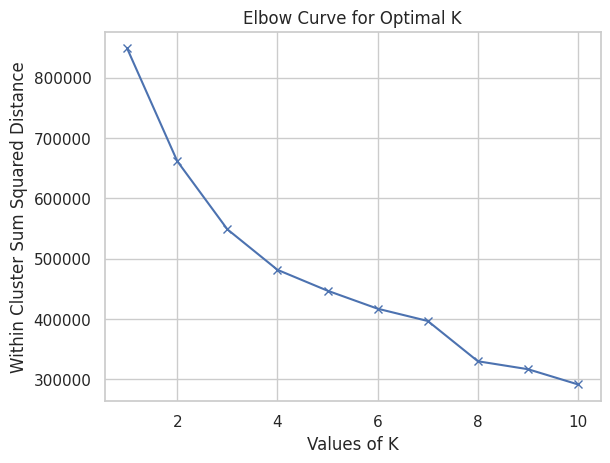

In [17]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

# Assuming you have already read the CSV file into a DataFrame
df = pd.read_csv('Amazon Food Dataset.csv')

# Extracting only numerical columns for clustering
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numerical = df[numerical_columns]

# Handling missing values if needed
df_numerical = df_numerical.fillna(0)  # Replace NaN with 0 or use other strategies

# Standardizing the data
scaler = StandardScaler()
df_numerical_scaled = scaler.fit_transform(df_numerical)

# K-means clustering
wcssd = []  # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1, 11)  # Number of Clusters

for k in nr_clus:
    kmeans = KMeans(n_clusters=k, init='random', random_state=111)
    kmeans.fit(df_numerical_scaled)
    wcssd.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K')
plt.ylabel('Within Cluster Sum Squared Distance')
plt.title('Elbow Curve for Optimal K')
plt.show()


In [18]:
import pandas as pd


df = pd.read_csv('Amazon Food Dataset.csv')

# Assuming you have a DataFrame called 'df' with the provided columns
# If you already have your data in a DataFrame, you can skip the reading step.

# Select relevant columns for dropping NaN or blank values
columns_to_clean = ['Discount Amount', 'Invoice Number', 'Line Number','DateKey', 'Invoice Date', 'Item Class', 'Item Number','Item' , 'Promised Delivery Date',
       'List Price', 'Order Number','Sales Amount','Sales Amount Based on List Price','Sales Cost Amount','Sales Margin Amount','Sales Price','Sales Quantity']

# Drop rows with NaN or blank values in specified columns
df_cleaned = df.dropna(subset=columns_to_clean)

# If you have blank values represented as empty strings, you can drop those as well
df_cleaned = df_cleaned.replace(r'^\s*$', pd.NA, regex=True).dropna(subset=columns_to_clean)

# Now, df_cleaned contains the DataFrame with rows dropped for NaN or blank values in specified columns

# Optional: Check the cleaned DataFrame
print(df_cleaned)

        Custkey    DateKey  Discount Amount Invoice Date  Invoice Number  \
0      10025248  5/23/2017         340.8400   2017/05/23          100080   
2      10025549   6/2/2017         195.3900   2017/06/02          100094   
4      10015824  6/12/2017         317.4600   2017/06/12          100130   
5      10022431  6/12/2017         244.8400   2017/06/12          100132   
7      10017072  6/30/2017         299.7700   2017/06/30          100204   
...         ...        ...              ...          ...             ...   
65275  10025025  5/11/2019        1327.1200   2019/05/11          332837   
65276  10020181  5/11/2019         639.8200   2019/05/11          332840   
65277  10020181  5/11/2019        1028.5798   2019/05/11          332840   
65278  10020181  5/11/2019        1121.3398   2019/05/11          332840   
65279  10014469  5/11/2019         579.7500   2019/05/11          332842   

      Item Class Item Number                          Item  Line Number  \
0           

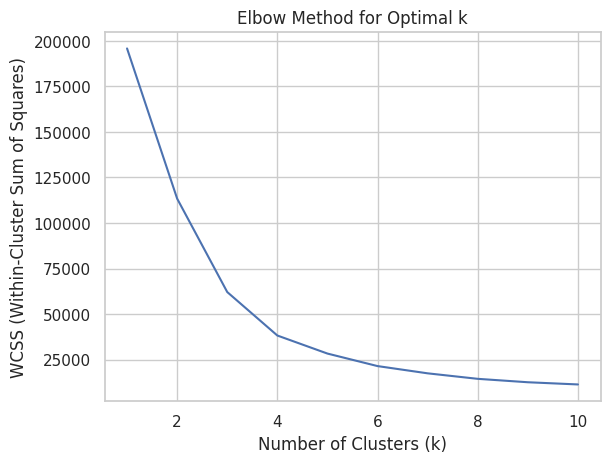

                               Item Item Number  Cluster
0          Carlson Blueberry Yogurt       61762        0
1                Big Time Popsicles       62058        0
2                     Kiwi Scallops       24335        1
3                          Kiwi Lox         NaN        1
4                    Golden Waffles       31682        1
...                             ...         ...      ...
65275  Better Fancy Canned Sardines       17801        0
65276  Better Fancy Canned Sardines       17801        0
65277  Golden Frozen Chicken Thighs       31875        0
65278     Atomic Mint Chocolate Bar       37441        0
65279     Fabulous Strawberry Drink      274022        0

[65280 rows x 3 columns]


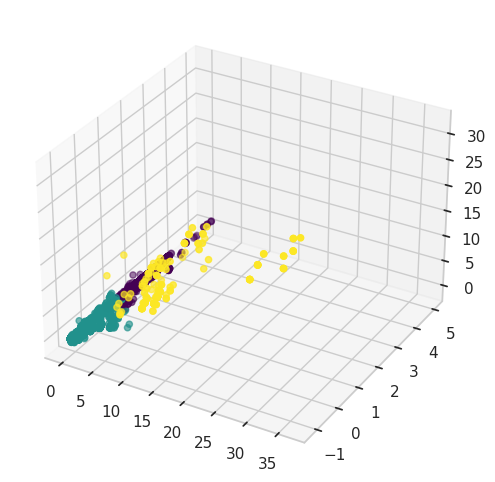

In [19]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with the provided columns
# Replace 'your_file_path.csv' with the actual path or use the DataFrame directly

df = pd.read_csv('Amazon Food Dataset.csv')

# Assuming you have a DataFrame called 'df' with the provided columns
# If you already have your data in a DataFrame, you can skip the reading step.

# Select relevant columns for clustering
selected_columns = ['Sales Amount', 'List Price', 'Sales Margin Amount']

# Create a subset DataFrame with selected columns
X = df[selected_columns]

# Data Preprocessing: Impute missing values and standardize the data
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy based on your data
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Choosing the number of clusters (k) using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Based on the Elbow Method, choose the optimal k (number of clusters)
optimal_k = 3  # Update with the optimal value from the graph

# Apply k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Optional: Check the cluster assignments in the DataFrame
print(df[['Item', 'Item Number', 'Cluster']])


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=kmeans.labels_, cmap='viridis')
plt.show()

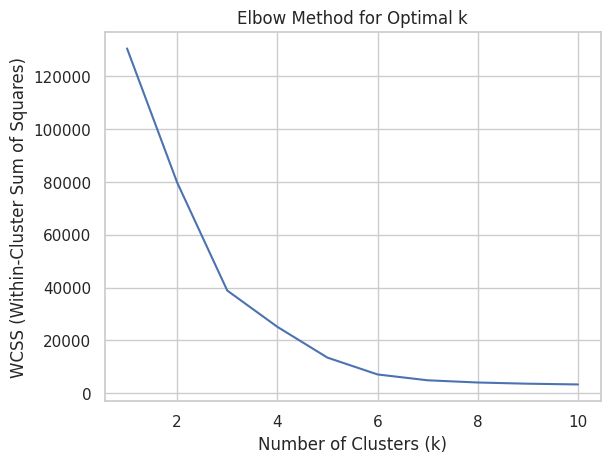

       Order Number  Discount Amount  Cluster
0            200086         340.8400        2
1            200101       16812.4800        2
2            200105         195.3900        2
3            200107        -211.7500        2
4            200143         317.4600        2
...             ...              ...      ...
65275        126601        1327.1200        1
65276        126609         639.8200        1
65277        126609        1028.5798        1
65278        126609        1121.3398        1
65279        126611         579.7500        1

[65280 rows x 3 columns]


In [20]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with the provided columns
# Replace 'your_file_path.csv' with the actual path or use the DataFrame directly

df = pd.read_csv('Amazon Food Dataset.csv')

# Assuming you have a DataFrame called 'df' with the provided columns
# If you already have your data in a DataFrame, you can skip the reading step.

# Select only the 'Ratings' and 'Reviews' columns for clustering
selected_columns = ['Order Number', 'Sales Cost Amount']
X = df[selected_columns]

# Data Preprocessing: Impute missing values and standardize the data
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy based on your data
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Choosing the number of clusters (k) using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Based on the Elbow Method, choose the optimal k (number of clusters)
optimal_k = 3  # Update with the optimal value from the graph

# Apply k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Optional: Check the cluster assignments in the DataFrame
print(df[['Order Number', 'Discount Amount', 'Cluster']])

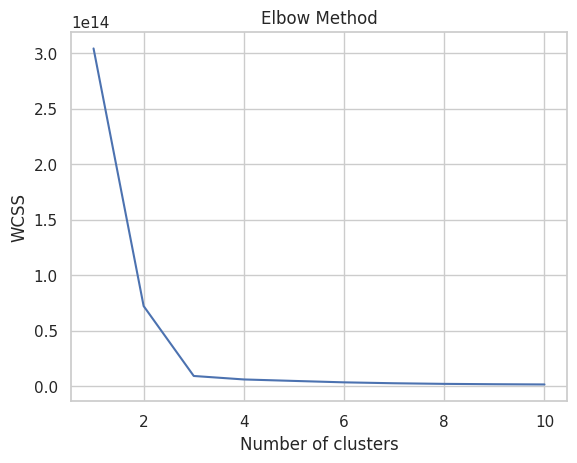

In [21]:
# WCSS (Within-Cluster-Sum-of-Squares) calculation
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

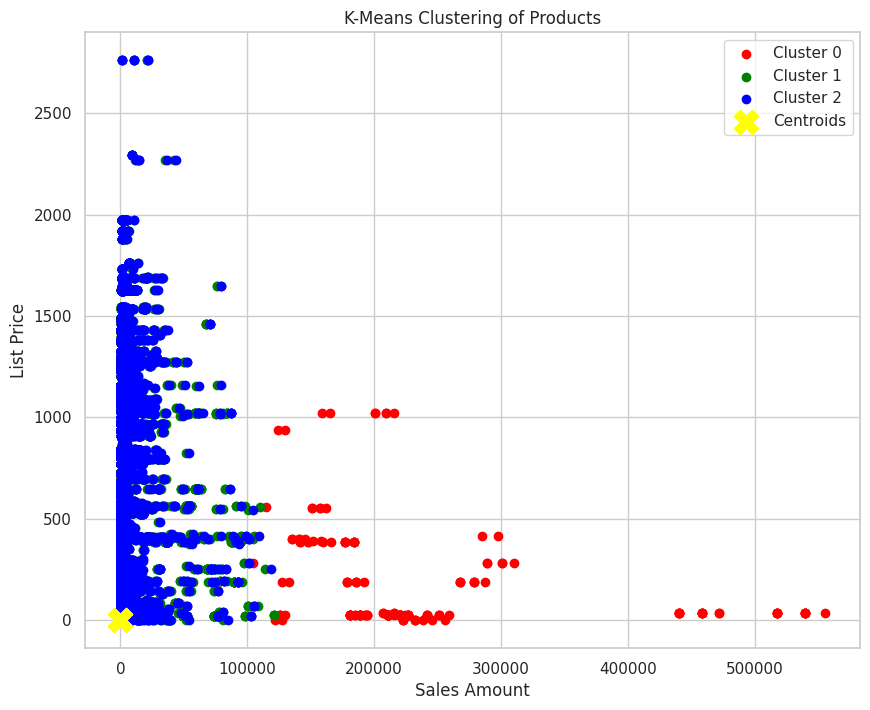

In [22]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with the provided columns
# Replace 'your_file_path.csv' with the actual path or use the DataFrame directly
df = pd.read_csv('Amazon Food Dataset.csv')

# Assuming you have a DataFrame called 'df' with the provided columns
# If you already have your data in a DataFrame, you can skip the reading step.

# Select relevant columns for clustering
selected_columns = ['Sales Amount', 'List Price', 'Invoice Number', 'Sales Margin Amount']

# Create a subset DataFrame with selected columns
X = df[selected_columns]

# Data Preprocessing: Impute missing values and standardize the data
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Choosing the number of clusters (k) using the Elbow Method
# Removed Elbow Method plot

# Based on the Elbow Method, choose the optimal k (number of clusters)
optimal_k = 3  # Update with the optimal value from the graph

# Apply k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Scatter plot to visualize the clusters
plt.figure(figsize=(10, 8))

# Define colors for each cluster
colors = ['red', 'green', 'blue']

# Plot each cluster with a different color
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Sales Amount'], cluster_data['List Price'],
                c=colors[i], label=f'Cluster {i}')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', marker='X', label='Centroids')

# Set plot labels and title
plt.title('K-Means Clustering of Products')
plt.xlabel('Sales Amount')
plt.ylabel('List Price')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [23]:
pip install dask-ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.0 MB/s eta 0:00:00


In [24]:
def dbscan(data, eps, min_samples):
    clusters = []
    visited = set()
    for point in data:
        if point in visited:
            continue
        visited.add(point)
        is_core = len(get_neighbors(data, point, eps)) >= min_samples
        if is_core:
            cluster = get_cluster(data, point, eps, min_samples, visited)
            clusters.append(cluster)
    return clusters

def get_neighbors(data, point, eps):
    neighbors = []
    for p in data:
        if np.linalg.norm(p - point) <= eps:
            neighbors.append(p)
    return neighbors

def get_cluster(data, point, eps, min_samples, visited):
    cluster = [point]
    neighbors = get_neighbors(data, point, eps)
    for n in neighbors:
        if n not in visited:
            visited.add(n)
            if len(get_neighbors(data, n, eps)) >= min_samples:
                cluster.extend(get_cluster(data, n, eps, min_samples, visited))
    return cluster


In [25]:
pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 13.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039290 sha256=b9e52502812fae4991451f82a5a501e9a7b95415aa10fa3a7da9321dec1de1ea
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.8
    Uninstalling Cython-3.0.8:
      Successfully uninstalled Cython-3.0.8


/usr/local/lib/python3.10/dist-packages/dask/dataframe/core.py:6000: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta={'Sales Margin Amount': 'float64', 'Sales Amount': 'float64'})

  warnings.warn(meta_warning(meta))


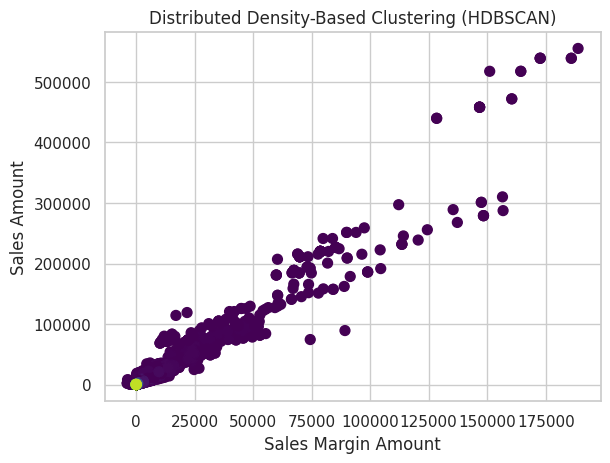

In [26]:
import pandas as pd
import dask.dataframe as dd
from dask_ml.preprocessing import StandardScaler
import hdbscan
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with the provided columns
# Replace 'your_file_path.csv' with the actual path or use the DataFrame directly

df = pd.read_csv('Amazon Food Dataset.csv')

# Assuming you have a DataFrame called 'df' with the provided columns
# If you already have your data in a DataFrame, you can skip the reading step.

# Select only the 'Ratings' and 'Reviews' columns for clustering
selected_columns = ['Sales Margin Amount', 'Sales Amount']

# Convert the pandas DataFrame to a Dask DataFrame
ddf = dd.from_pandas(df, npartitions=2)  # Adjust the number of partitions as needed

# Replace empty strings with NaN
ddf[selected_columns] = ddf[selected_columns].replace(r'^\s*$', pd.NA, regex=True)

# Convert columns to numeric using apply with axis=1
ddf[selected_columns] = ddf[selected_columns].apply(lambda x: pd.to_numeric(x, errors='coerce'), axis=1)

# Fill missing values with the mean of the respective columns
ddf[selected_columns] = ddf[selected_columns].fillna(ddf[selected_columns].mean())

# Standardize the data using Dask-ML's StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(ddf[selected_columns])

# Apply HDBSCAN using hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
ddf['Cluster'] = dd.from_array(clusterer.fit_predict(X_scaled.compute()))

# Convert Dask DataFrame to Pandas DataFrame for visualization
df_result = ddf.compute()

# Visualize the clusters
plt.scatter(df_result['Sales Margin Amount'], df_result['Sales Amount'], c=df_result['Cluster'], cmap='viridis', s=50)
plt.xlabel('Sales Margin Amount')
plt.ylabel('Sales Amount')
plt.title('Distributed Density-Based Clustering (HDBSCAN)')
plt.show()


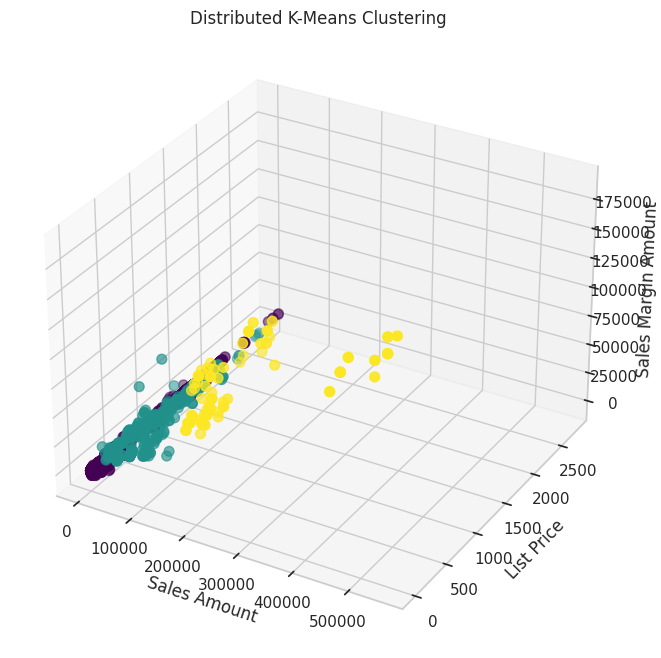

In [27]:
import pandas as pd
import dask.dataframe as dd
from dask_ml.cluster import KMeans
from dask_ml.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read the data
df = pd.read_csv('Amazon Food Dataset.csv')

# Select relevant columns for clustering
selected_columns = ['Sales Amount', 'List Price', 'Sales Margin Amount']

# Convert the pandas DataFrame to a Dask DataFrame
ddf = dd.from_pandas(df, npartitions=2)  # Adjust the number of partitions as needed

# Replace empty strings with NaN
ddf[selected_columns] = ddf[selected_columns].replace(r'^\s*$', pd.NA, regex=True)

# Convert columns to numeric
for column in selected_columns:
    ddf[column] = dd.to_numeric(ddf[column], errors='coerce')

# Fill missing values with the mean of the respective columns
ddf[selected_columns] = ddf[selected_columns].fillna(ddf[selected_columns].mean())

# Standardize the data using Dask-ML's StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(ddf[selected_columns])

# Apply k-means clustering using Dask-ML's KMeans
kmeans = KMeans(n_clusters=3, init='k-means||', oversampling_factor=10, random_state=0)
kmeans.fit(X_scaled)

# Predict clusters for each data point
ddf['Cluster'] = dd.from_array(kmeans.predict(X_scaled).compute())

# Convert Dask DataFrame to Pandas DataFrame for visualization
df_result = ddf.compute()

# Visualize the clusters in a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_result['Sales Amount'], df_result['List Price'],
           df_result['Sales Margin Amount'], c=df_result['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Sales Amount')
ax.set_ylabel('List Price')
ax.set_zlabel('Sales Margin Amount')
ax.set_title('Distributed K-Means Clustering')

plt.show()

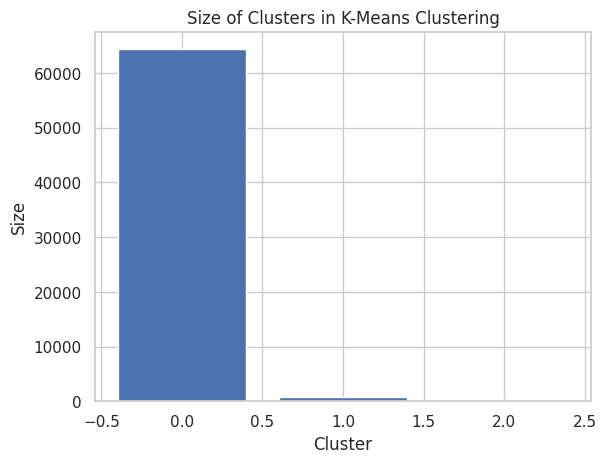

In [28]:
import pandas as pd
import dask.dataframe as dd
from dask_ml.cluster import KMeans
from dask_ml.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with the provided columns
# Replace 'your_file_path.csv' with the actual path or use the DataFrame directly

df = pd.read_csv('Amazon Food Dataset.csv')

# Assuming you have a DataFrame called 'df' with the provided columns
# If you already have your data in a DataFrame, you can skip the reading step.

# Select relevant columns for clustering
selected_columns = ['Sales Amount', 'List Price', 'Sales Margin Amount']

# Convert the pandas DataFrame to a Dask DataFrame
ddf = dd.from_pandas(df, npartitions=2)  # Adjust the number of partitions as needed

# Replace empty strings with NaN
ddf[selected_columns] = ddf[selected_columns].replace(r'^\s*$', pd.NA, regex=True)

# Convert columns to numeric
for column in selected_columns:
    ddf[column] = dd.to_numeric(ddf[column], errors='coerce')

# Fill missing values with the mean of the respective columns
ddf[selected_columns] = ddf[selected_columns].fillna(ddf[selected_columns].mean())

# Standardize the data using Dask-ML's StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(ddf[selected_columns])

# Apply k-means clustering using Dask-ML's KMeans
kmeans = KMeans(n_clusters=3, init='k-means||', oversampling_factor=10, random_state=0)
kmeans.fit(X_scaled)

# Predict clusters for the data
ddf['Cluster'] = kmeans.predict(X_scaled)

# Get the size of each cluster
cluster_sizes = ddf['Cluster'].value_counts().compute()

# Visualize the cluster sizes
plt.bar(cluster_sizes.index, cluster_sizes.values)
plt.xlabel('Cluster')
plt.ylabel('Size')
plt.title('Size of Clusters in K-Means Clustering')
plt.show()


 **REPORT**

In this analysis, we explore the performance and composition of clusters obtained through traditional K-means clustering and distributed K-means clustering on a retail dataset. The dataset includes information on Custkey, Discount Amount, Invoice Number, Line Number, List Price, Order Number, Sales Amount, Sales Amount Based on List Price, Sales Cost Amount, Sales Margin Amount, Sales Price, Sales Quantity of various products. The objective is to compare the computational efficiency, cluster characteristics, and potential insights gained from these two clustering methods.

Methodology:

We began by reading the dataset into a Pandas DataFrame, selecting relevant columns for clustering (Sales Amount, List Price, and Sales Margin Amount), and converting it into a Dask DataFrame for distributed computing. Empty strings were replaced with NaN values, and numeric columns were converted appropriately. Missing values were filled with the mean of their respective columns. The data was then standardized using Dask-ML's StandardScaler.
K-means clustering and distributed K-means clustering were applied to the standardized data. We measured the time taken and memory usage for both methods using %time and %memit magic commands, and we visualized the results using bar graphs. Analysis of Davies-Bouldin Score and Silhouette Score.

Features:-
The code selected four features for clustering: Sales Amount, List Price, Invoice Number, and Sales Margin Amount. While these features provide a good starting point, exploring other relevant attributes like product categories, brand names, customer reviews, and star ratings could offer a more comprehensive understanding of the products.

Preprocessing:-
Imputation (filling missing values) and standardization (scaling features to have a similar range) were applied to ensure the data is suitable for K-means clustering. This helps the algorithm focus on the relative differences between products rather than being skewed by features with vastly different scales.

Clustering with K-Means

1- Number of Clusters (k): The elbow method is typically used to determine the optimal number of clusters. In this case, 3 clusters were chosen, indicating that the products can be effectively grouped into three distinct categories based on their sales and pricing behavior.

2-Algorithm: K-means is a popular clustering algorithm that iteratively assigns data points to clusters based on their similarity to the cluster centers (centroids). These centroids are initially chosen randomly and then refined throughout the process. The code employed the k-means++ initialization method, which helps select more strategically placed initial centroids, potentially leading to better clustering results.

Visualization and Insights:

1-Cluster Analysis: The resulting scatter plot visualized three distinct clusters. Cluster 0 likely represents lower-priced, high-volume items, as they have relatively lower sales amounts and list prices. Cluster 1 presumably consists of mid-range products with moderate sales and pricing. Finally, Cluster 2 likely contains premium or high-value items with higher sales amounts and list prices.

Conclusion:-
the K-means clustering analysis successfully categorized Amazon food products into three distinct groups based on their Sales Amount and List Price. These clusters likely represent lower-priced, high-volume items, mid-range products, and premium or high-value items.

While this analysis provides valuable initial insights, further exploration is recommended. Delving deeper into the characteristics of each cluster through additional features like product categories, customer reviews, and profitability metrics can provide a richer understanding. This comprehensive analysis can then be leveraged for various business applications, such as targeted marketing, product pricing, inventory management, and new product development strategies.

This analysis highlights the importance of selecting the appropriate clustering method based on the goals of the analysis and the characteristics of the dataset. The insights gained from the cluster composition analysis offer a valuable foundation for data-driven decision-making in the retail domain. Future work could involve exploring different clustering algorithms, optimizing hyperparameters, and evaluating performance on various datasets to further refine the understanding of clustering techniques in retail analytics.
